In [1]:
import pandas as pd
import os
import numpy as np

cur_dir = os.getcwd()
path = os.path.join(cur_dir,'dataset','train.csv')
path

df_train = pd.read_csv( os.path.join(cur_dir,'dataset','train.csv'), sep=',' )
df_movies = pd.read_csv( os.path.join(cur_dir,'dataset','movies.csv'), sep='::' )
df_users = pd.read_csv( os.path.join(cur_dir,'dataset','users.csv'), sep='::' )
df_test = pd.read_csv( os.path.join(cur_dir,'dataset','test.csv'), sep=',' )
df_SampleSubmisson = pd.read_csv( os.path.join(cur_dir,'dataset','SampleSubmisson.csv'), sep=',' )

mean = df_train.Rating.mean()
std = df_train.Rating.std()
df_train['Rating_normalized'] = (df_train['Rating'] - mean)/std

all_user = np.concatenate([df_train.UserID,df_test.UserID],axis=0)
all_movie = np.concatenate([df_train.MovieID,df_test.MovieID],axis=0)
print(all_user.shape)
print(all_movie.shape)
all_user = np.unique(all_user)
all_movie = np.unique(all_movie)
print(all_user.shape)
print(all_movie.shape)


df_all_movie = pd.DataFrame({'movie_id':all_movie})
df_all_movie['movie_index'] = df_all_movie.index

df_all_user = pd.DataFrame({'user_id':all_user})
df_all_user['user_index'] = df_all_user.index


movie_id_to_index = df_all_movie.set_index('movie_id').to_dict()
movie_id_to_index = movie_id_to_index['movie_index']
user_id_to_index = df_all_user.set_index('user_id').to_dict()
user_id_to_index = user_id_to_index['user_index']

df_train['user_index'] =  df_train.apply(lambda row: user_id_to_index[row.UserID] ,axis=1)
df_train['movie_index'] =  df_train.apply(lambda row: movie_id_to_index[row.MovieID] ,axis=1)

df_train



/media/disk3/feynman52/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.
/media/disk3/feynman52/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()


(1000209,)
(1000209,)
(6040,)
(3706,)


,TrainDataID,UserID,MovieID,Rating,Rating_normalized,user_index,movie_index
0,1,796,1193,5,1.269845,795,1104
1,2,796,661,3,-0.520828,795,639
2,3,796,914,3,-0.520828,795,853
3,4,796,3408,4,0.374509,795,3177
4,5,796,2355,5,1.269845,795,2162
5,6,796,1197,3,-0.520828,795,1107
6,7,796,1287,5,1.269845,795,1195
7,8,796,2804,5,1.269845,795,2599
8,9,796,919,4,0.374509,795,858
9,10,796,595,5,1.269845,795,581


In [2]:
df_train

,TrainDataID,UserID,MovieID,Rating,Rating_normalized,user_index,movie_index
0,1,796,1193,5,1.269845,795,1104
1,2,796,661,3,-0.520828,795,639
2,3,796,914,3,-0.520828,795,853
3,4,796,3408,4,0.374509,795,3177
4,5,796,2355,5,1.269845,795,2162
5,6,796,1197,3,-0.520828,795,1107
6,7,796,1287,5,1.269845,795,1195
7,8,796,2804,5,1.269845,795,2599
8,9,796,919,4,0.374509,795,858
9,10,796,595,5,1.269845,795,581


In [3]:

user_train = df_train.user_index
movie_train = df_train.movie_index
rating_train = df_train.Rating


In [4]:
from keras.layers import Input, Dense, Embedding, Flatten, dot, add, concatenate
from keras.models import Model
from keras.utils import get_custom_objects
import keras.backend as K
from sklearn.utils import shuffle
import matplotlib.pylab as plt

Using TensorFlow backend.


In [5]:
n_users= df_all_user.shape[0]
n_movies= df_all_movie.shape[0]
latent_dim=20
n_movies

3706

In [6]:
# build model---------------------------------------------------------
user_input = Input(shape=(1,))
movie_input = Input(shape=(1,))

user_vecter = Embedding(n_users, latent_dim, embeddings_initializer="random_normal")(user_input)
user_vecter = Flatten()(user_vecter)
movie_vecter = Embedding(n_movies, latent_dim, embeddings_initializer="random_normal")(movie_input)
movie_vecter = Flatten()(movie_vecter)
rating_predict = dot([user_vecter,movie_vecter],axes=1)

model_dot = Model([user_input,movie_input],rating_predict)

# compile model---------------------------------------------------------
def rmse(y_true, y_pred):
    y_pred = K.clip(y_pred, 1.0, 5.0)
    return K.sqrt(K.mean(K.pow(y_true - y_pred, 2)))
get_custom_objects().update({"rmse": rmse})

model_dot.compile(loss="mse", optimizer="adam", metrics=[rmse])

model_dot.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 20)        120800      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 20)        74120       input_2[0][0]                    
__________________________________________________________________________________________________
flatten_1 

In [7]:
batch_size=1000
epochs = 10
user_train2, movie_train2, rating_train2 = shuffle(user_train, movie_train, rating_train)

history_dot = model_dot.fit([user_train2, movie_train2],
                    rating_train2,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    shuffle=True)

Train on 809885 samples, validate on 89988 samples
Epoch 1/10
809885/809885 [==============================] - 5s 6us/step - loss: 11.7671 - rmse: 2.7121 - val_loss: 3.9665 - val_rmse: 1.9511
Epoch 2/10
809885/809885 [==============================] - 4s 5us/step - loss: 1.7434 - rmse: 1.2871 - val_loss: 1.0762 - val_rmse: 1.0338
Epoch 3/10
809885/809885 [==============================] - 4s 4us/step - loss: 0.9447 - rmse: 0.9696 - val_loss: 0.8888 - val_rmse: 0.9411
Epoch 4/10
809885/809885 [==============================] - 3s 4us/step - loss: 0.8524 - rmse: 0.9220 - val_loss: 0.8446 - val_rmse: 0.9177
Epoch 5/10
809885/809885 [==============================] - 3s 4us/step - loss: 0.8224 - rmse: 0.9060 - val_loss: 0.8248 - val_rmse: 0.9071
Epoch 6/10
809885/809885 [==============================] - 3s 4us/step - loss: 0.8032 - rmse: 0.8955 - val_loss: 0.8102 - val_rmse: 0.8991
Epoch 7/10
809885/809885 [==============================] - 3s 4us/step - loss: 0.7875 - rmse: 0.8867 - val_

# tsne

In [8]:
df_movies = pd.read_csv( os.path.join(cur_dir,'dataset','movies.csv'), sep='::' )
df_movies['Genres_first'] = df_movies.apply(lambda row: row['Genres'].split('|')[0] ,axis=1)
df_movies



/media/disk3/feynman52/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,movieID,Title,Genres,Genres_first
0,1,Toy Story (1995),Animation|Children's|Comedy,Animation
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Adventure
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy
3,4,Waiting to Exhale (1995),Comedy|Drama,Comedy
4,5,Father of the Bride Part II (1995),Comedy,Comedy
5,6,Heat (1995),Action|Crime|Thriller,Action
6,7,Sabrina (1995),Comedy|Romance,Comedy
7,8,Tom and Huck (1995),Adventure|Children's,Adventure
8,9,Sudden Death (1995),Action,Action
9,10,GoldenEye (1995),Action|Adventure|Thriller,Action


In [9]:
genre_list = list(df_movies['Genres_first'].value_counts().index)
# genre_list.index('Comedy')
genre_list.sort()
genre_list

['Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [10]:
df_movies['Genres_label'] = df_movies.apply(lambda row: genre_list.index( row['Genres_first'] ) ,axis=1)
df_movies = df_movies.rename(columns={'movieID': 'movie_id'})
df_movies



,movie_id,Title,Genres,Genres_first,Genres_label
0,1,Toy Story (1995),Animation|Children's|Comedy,Animation,2
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Adventure,1
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy,4
3,4,Waiting to Exhale (1995),Comedy|Drama,Comedy,4
4,5,Father of the Bride Part II (1995),Comedy,Comedy,4
5,6,Heat (1995),Action|Crime|Thriller,Action,0
6,7,Sabrina (1995),Comedy|Romance,Comedy,4
7,8,Tom and Huck (1995),Adventure|Children's,Adventure,1
8,9,Sudden Death (1995),Action,Action,0
9,10,GoldenEye (1995),Action|Adventure|Thriller,Action,0


In [11]:
df_all_movie2 = pd.merge(df_all_movie, df_movies, how='left', on=['movie_id'])
df_all_movie2 

,movie_id,movie_index,Title,Genres,Genres_first,Genres_label
0,1,0,Toy Story (1995),Animation|Children's|Comedy,Animation,2
1,2,1,Jumanji (1995),Adventure|Children's|Fantasy,Adventure,1
2,3,2,Grumpier Old Men (1995),Comedy|Romance,Comedy,4
3,4,3,Waiting to Exhale (1995),Comedy|Drama,Comedy,4
4,5,4,Father of the Bride Part II (1995),Comedy,Comedy,4
5,6,5,Heat (1995),Action|Crime|Thriller,Action,0
6,7,6,Sabrina (1995),Comedy|Romance,Comedy,4
7,8,7,Tom and Huck (1995),Adventure|Children's,Adventure,1
8,9,8,Sudden Death (1995),Action,Action,0
9,10,9,GoldenEye (1995),Action|Adventure|Thriller,Action,0


In [12]:
df_all_movie2['Genres_label'].values

array([2, 1, 4, ..., 7, 7, 7])

# embedding: (1,) => (1,3706) => (1,20)

In [13]:
movie_embedding = np.array(model_dot.layers[3].get_weights())
print(movie_embedding.shape)
movie_embedding = movie_embedding.squeeze()
print(movie_embedding.shape)

(1, 3706, 20)
(3706, 20)


In [14]:
dim_list = ['dim_%s'%(i) for i in range(movie_embedding.shape[1])]
dim_list

['dim_0',
 'dim_1',
 'dim_2',
 'dim_3',
 'dim_4',
 'dim_5',
 'dim_6',
 'dim_7',
 'dim_8',
 'dim_9',
 'dim_10',
 'dim_11',
 'dim_12',
 'dim_13',
 'dim_14',
 'dim_15',
 'dim_16',
 'dim_17',
 'dim_18',
 'dim_19']

In [15]:
df_movie_embedding = pd.DataFrame(movie_embedding,columns=dim_list)
df_movie_embedding



,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,dim_11,dim_12,dim_13,dim_14,dim_15,dim_16,dim_17,dim_18,dim_19
0,-0.705830,0.641787,0.695691,0.698166,0.286814,-0.344945,-0.574166,-0.583312,-0.596866,-0.672843,-0.574305,0.636448,0.284360,0.190539,-0.629626,-0.525626,0.521007,-0.643939,-0.834740,0.562265
1,-0.600310,0.652749,0.491870,0.485040,0.472503,-0.452841,-0.444157,-0.527695,-0.426679,-0.480454,-0.319357,0.291562,-0.384603,-0.297519,-0.506519,-0.325150,0.414661,-0.476926,-0.513964,0.584552
2,-0.535863,0.551493,0.426523,0.565914,0.661840,-0.429127,-0.304370,-0.419590,-0.354158,-0.443409,-0.348082,0.477766,-0.487021,-0.220839,-0.447680,-0.170193,0.438463,-0.457390,-0.416841,0.510817
3,-0.465549,0.497284,0.391379,0.167246,0.273602,-0.442934,-0.557451,-0.399980,-0.445350,-0.507449,-0.396496,0.450639,-0.091162,0.033178,-0.366787,-0.163025,0.384924,-0.476350,-0.438598,0.371167
4,-0.500639,0.409525,0.528520,0.416295,0.402969,-0.494986,-0.336621,-0.422707,-0.426171,-0.502358,-0.430888,0.439363,-0.399415,-0.441657,-0.342177,-0.188000,0.397699,-0.545421,-0.448001,0.494079
5,-0.671271,0.475832,0.508191,0.584823,0.337161,-0.274454,-0.571421,-0.602702,-0.560347,-0.512809,-0.559522,0.609867,-0.617412,0.451669,-0.420444,-0.534279,0.596396,-0.574836,-0.628132,0.610877
6,-0.443957,0.529173,0.496724,0.345160,0.395478,-0.595057,-0.530107,-0.549247,-0.499344,-0.610748,-0.426648,0.440951,-0.530285,-0.097892,-0.346028,-0.267499,0.535620,-0.505751,-0.489983,0.762880
7,-0.376396,0.465883,0.401609,0.504691,0.444983,-0.543991,-0.551892,-0.451409,-0.369536,-0.506186,-0.416636,0.475361,-0.312190,0.127338,-0.462607,-0.425835,0.456478,-0.458999,-0.468732,0.443309
8,-0.441024,0.399814,0.231760,0.368004,0.550564,-0.527081,-0.357979,-0.379463,-0.238011,-0.476803,-0.465388,0.356595,-0.587498,-0.490406,-0.391781,-0.229580,0.497469,-0.446336,-0.417132,0.280111
9,-0.592210,0.471296,0.542195,0.746278,0.379615,-0.206320,-0.268259,-0.482814,-0.575702,-0.435182,-0.267697,0.461583,-0.804286,-0.251092,-0.666444,-0.406606,0.511152,-0.717480,-0.585147,0.446046


In [16]:
df_movie_embedding['Genres_label'] = df_all_movie2['Genres_label'].values
df_movie_embedding

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_11,dim_12,dim_13,dim_14,dim_15,dim_16,dim_17,dim_18,dim_19,Genres_label
0,-0.705830,0.641787,0.695691,0.698166,0.286814,-0.344945,-0.574166,-0.583312,-0.596866,-0.672843,...,0.636448,0.284360,0.190539,-0.629626,-0.525626,0.521007,-0.643939,-0.834740,0.562265,2
1,-0.600310,0.652749,0.491870,0.485040,0.472503,-0.452841,-0.444157,-0.527695,-0.426679,-0.480454,...,0.291562,-0.384603,-0.297519,-0.506519,-0.325150,0.414661,-0.476926,-0.513964,0.584552,1
2,-0.535863,0.551493,0.426523,0.565914,0.661840,-0.429127,-0.304370,-0.419590,-0.354158,-0.443409,...,0.477766,-0.487021,-0.220839,-0.447680,-0.170193,0.438463,-0.457390,-0.416841,0.510817,4
3,-0.465549,0.497284,0.391379,0.167246,0.273602,-0.442934,-0.557451,-0.399980,-0.445350,-0.507449,...,0.450639,-0.091162,0.033178,-0.366787,-0.163025,0.384924,-0.476350,-0.438598,0.371167,4
4,-0.500639,0.409525,0.528520,0.416295,0.402969,-0.494986,-0.336621,-0.422707,-0.426171,-0.502358,...,0.439363,-0.399415,-0.441657,-0.342177,-0.188000,0.397699,-0.545421,-0.448001,0.494079,4
5,-0.671271,0.475832,0.508191,0.584823,0.337161,-0.274454,-0.571421,-0.602702,-0.560347,-0.512809,...,0.609867,-0.617412,0.451669,-0.420444,-0.534279,0.596396,-0.574836,-0.628132,0.610877,0
6,-0.443957,0.529173,0.496724,0.345160,0.395478,-0.595057,-0.530107,-0.549247,-0.499344,-0.610748,...,0.440951,-0.530285,-0.097892,-0.346028,-0.267499,0.535620,-0.505751,-0.489983,0.762880,4
7,-0.376396,0.465883,0.401609,0.504691,0.444983,-0.543991,-0.551892,-0.451409,-0.369536,-0.506186,...,0.475361,-0.312190,0.127338,-0.462607,-0.425835,0.456478,-0.458999,-0.468732,0.443309,1
8,-0.441024,0.399814,0.231760,0.368004,0.550564,-0.527081,-0.357979,-0.379463,-0.238011,-0.476803,...,0.356595,-0.587498,-0.490406,-0.391781,-0.229580,0.497469,-0.446336,-0.417132,0.280111,0
9,-0.592210,0.471296,0.542195,0.746278,0.379615,-0.206320,-0.268259,-0.482814,-0.575702,-0.435182,...,0.461583,-0.804286,-0.251092,-0.666444,-0.406606,0.511152,-0.717480,-0.585147,0.446046,0


In [17]:
arr_tsne = df_movie_embedding[dim_list].values
arr_tsne.shape

(3706, 20)

In [18]:
import time

from sklearn.manifold import TSNE


time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, random_state=0, perplexity=80)
tsne_results = tsne.fit_transform(  arr_tsne )

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 3706 samples in 0.003s...
[t-SNE] Computed neighbors for 3706 samples in 0.874s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3706
[t-SNE] Computed conditional probabilities for sample 2000 / 3706
[t-SNE] Computed conditional probabilities for sample 3000 / 3706
[t-SNE] Computed conditional probabilities for sample 3706 / 3706
[t-SNE] Mean sigma: 0.176173
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.088249
[t-SNE] KL divergence after 1000 iterations: 1.468745


In [19]:
tsne_results.shape


(3706, 2)

In [20]:
df_movie_embedding['x-tsne'] = tsne_results[:,0]
df_movie_embedding['y-tsne'] = tsne_results[:,1]
df_movie_embedding

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_13,dim_14,dim_15,dim_16,dim_17,dim_18,dim_19,Genres_label,x-tsne,y-tsne
0,-0.705830,0.641787,0.695691,0.698166,0.286814,-0.344945,-0.574166,-0.583312,-0.596866,-0.672843,...,0.190539,-0.629626,-0.525626,0.521007,-0.643939,-0.834740,0.562265,2,8.429994,16.455061
1,-0.600310,0.652749,0.491870,0.485040,0.472503,-0.452841,-0.444157,-0.527695,-0.426679,-0.480454,...,-0.297519,-0.506519,-0.325150,0.414661,-0.476926,-0.513964,0.584552,1,18.385983,-4.772367
2,-0.535863,0.551493,0.426523,0.565914,0.661840,-0.429127,-0.304370,-0.419590,-0.354158,-0.443409,...,-0.220839,-0.447680,-0.170193,0.438463,-0.457390,-0.416841,0.510817,4,19.127960,-12.802305
3,-0.465549,0.497284,0.391379,0.167246,0.273602,-0.442934,-0.557451,-0.399980,-0.445350,-0.507449,...,0.033178,-0.366787,-0.163025,0.384924,-0.476350,-0.438598,0.371167,4,3.811953,-9.947310
4,-0.500639,0.409525,0.528520,0.416295,0.402969,-0.494986,-0.336621,-0.422707,-0.426171,-0.502358,...,-0.441657,-0.342177,-0.188000,0.397699,-0.545421,-0.448001,0.494079,4,22.744141,-15.198677
5,-0.671271,0.475832,0.508191,0.584823,0.337161,-0.274454,-0.571421,-0.602702,-0.560347,-0.512809,...,0.451669,-0.420444,-0.534279,0.596396,-0.574836,-0.628132,0.610877,0,5.324192,16.169975
6,-0.443957,0.529173,0.496724,0.345160,0.395478,-0.595057,-0.530107,-0.549247,-0.499344,-0.610748,...,-0.097892,-0.346028,-0.267499,0.535620,-0.505751,-0.489983,0.762880,4,17.607216,-1.470924
7,-0.376396,0.465883,0.401609,0.504691,0.444983,-0.543991,-0.551892,-0.451409,-0.369536,-0.506186,...,0.127338,-0.462607,-0.425835,0.456478,-0.458999,-0.468732,0.443309,1,2.190843,-3.552624
8,-0.441024,0.399814,0.231760,0.368004,0.550564,-0.527081,-0.357979,-0.379463,-0.238011,-0.476803,...,-0.490406,-0.391781,-0.229580,0.497469,-0.446336,-0.417132,0.280111,0,20.950655,-17.009556
9,-0.592210,0.471296,0.542195,0.746278,0.379615,-0.206320,-0.268259,-0.482814,-0.575702,-0.435182,...,-0.251092,-0.666444,-0.406606,0.511152,-0.717480,-0.585147,0.446046,0,23.977804,-1.961163


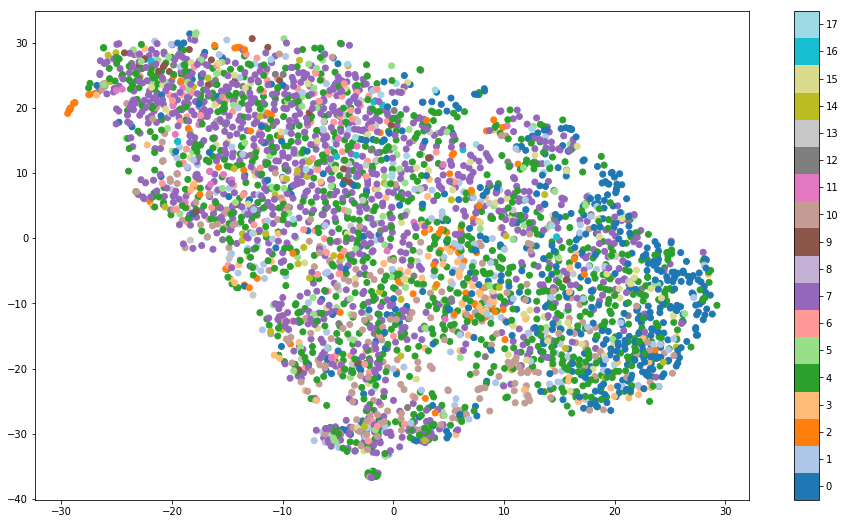

In [21]:
plt.figure(figsize=(16,9))
cmap = plt.cm.get_cmap("tab20", 18)

x = df_movie_embedding['x-tsne'].values
y = df_movie_embedding['y-tsne'].values
c = df_movie_embedding['Genres_label'].values


sc = plt.scatter(x, y, c=c, cmap=cmap)

plt.colorbar(ticks=range(18))
plt.clim(-0.5, 17.5)

plt.show()

In [22]:
df_Genres = pd.DataFrame(genre_list)
df_Genres

,0
0,Action
1,Adventure
2,Animation
3,Children's
4,Comedy
5,Crime
6,Documentary
7,Drama
8,Fantasy
9,Film-Noir
